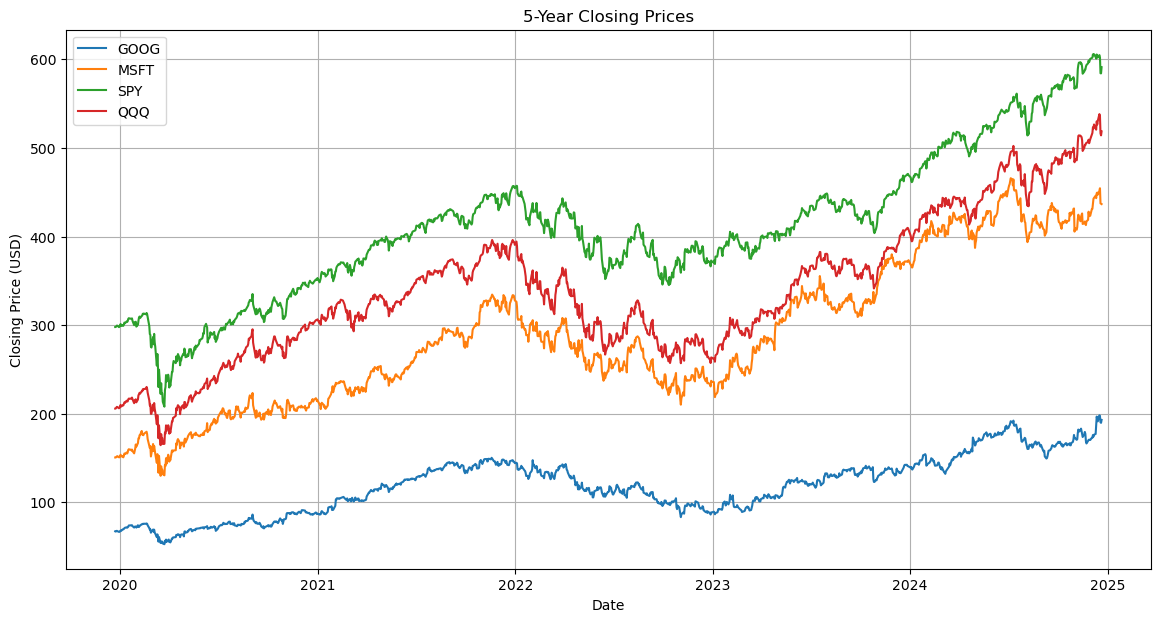

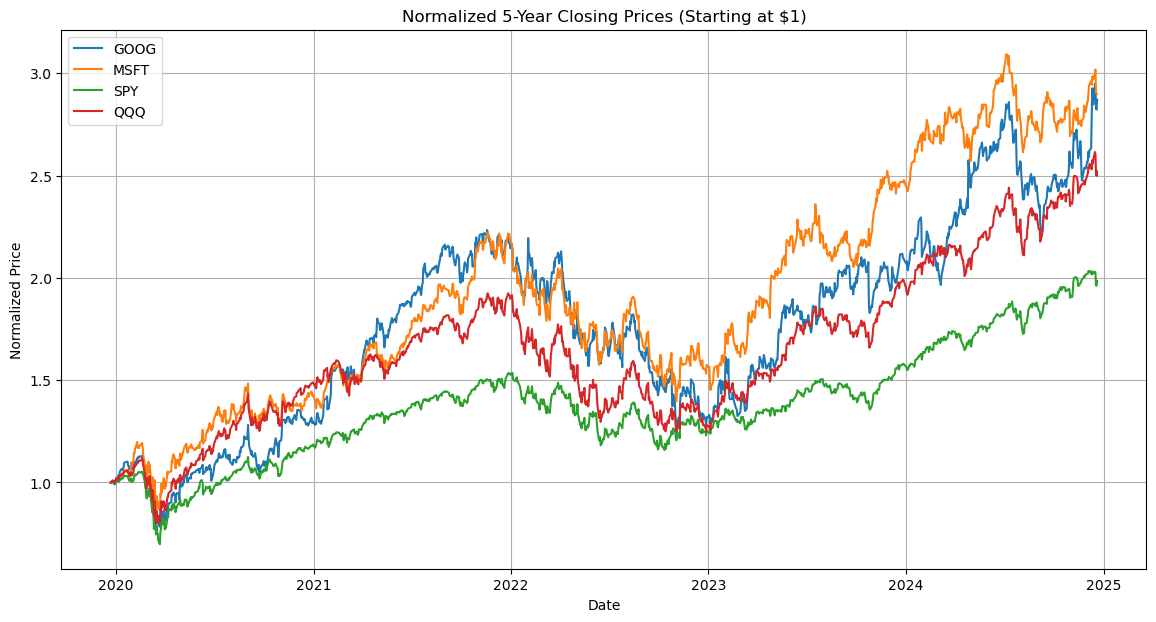

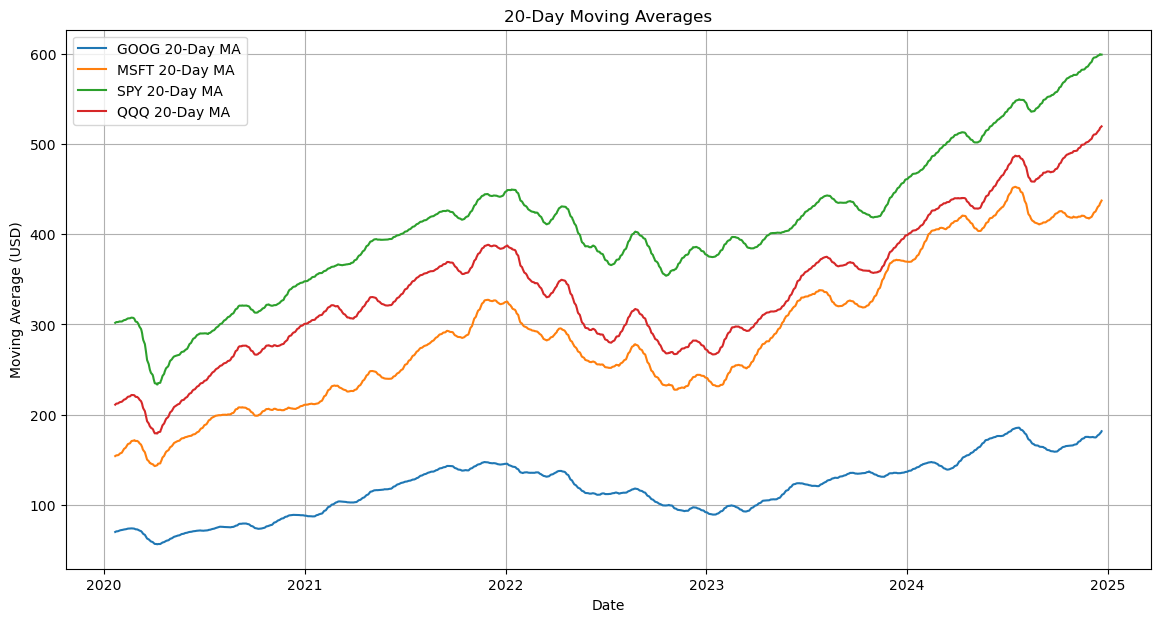


Beta Values:
MSFT: 0.904
GOOG: 1.034

Market Return (annualized): 0.15960438206880223
Market Risk Premium: 0.13960438206880224

Risk Premium for MSFT: 0.12620236139019722

Risk Premium for GOOG: 0.1443509310591415

Value at Risk (VaR) at 95% confidence level:
GOOG VaR: -3.08%
MSFT VaR: -2.86%

Sharpe Ratios:
GOOG: 0.75
MSFT: 0.79


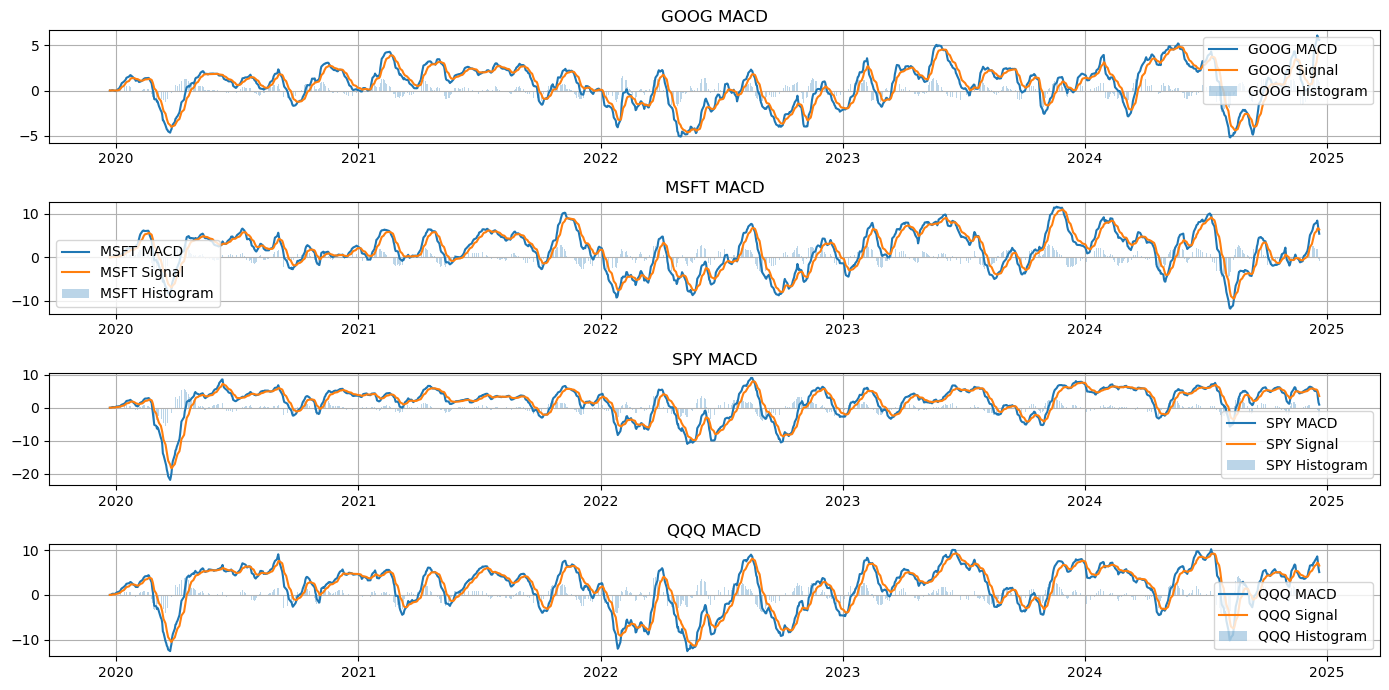


# How to Interpret MACD:
Bullish Signals: When the MACD line crosses above the signal line, it indicates a potential buy signal.
Bearish Signals: When the MACD line crosses below the signal line, it indicates a potential sell signal.
Divergences: When the price of a security and the MACD diverge (e.g., price is making new highs while MACD is not), it may indicate a potential trend reversal.


In [3]:
# Code to add Moving Average Convergence Divergence (MACD) to identify trend changes

import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

# Define the stock symbols and the period
symbols = ['GOOG', 'MSFT', 'SPY', 'QQQ']
period = '5y'

# Create an empty DataFrame to store the closing prices
data = pd.DataFrame()

# Fetch the closing prices for each stock
for symbol in symbols:
    data[symbol] = yf.Ticker(symbol).history(period=period)['Close']

# Plot the original closing prices
plt.figure(figsize=(14, 7))
for symbol in symbols:
    plt.plot(data.index, data[symbol], label=symbol)

plt.title('5-Year Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Normalize the prices so they all start at $1
normalized_data = data / data.iloc[0] * 1

# Plot the normalized prices
plt.figure(figsize=(14, 7))
for symbol in symbols:
    plt.plot(normalized_data.index, normalized_data[symbol], label=symbol)

plt.title('Normalized 5-Year Closing Prices (Starting at $1)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate 20-day moving averages for each stock
moving_averages = pd.DataFrame()
for symbol in symbols:
    moving_averages[f'{symbol}_MA20'] = data[symbol].rolling(window=20).mean()

# Plot the moving averages
plt.figure(figsize=(14, 7))
for symbol in symbols:
    plt.plot(data.index, moving_averages[f'{symbol}_MA20'], label=f'{symbol} 20-Day MA')

plt.title('20-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Moving Average (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate daily returns for each stock
returns = data.pct_change().dropna()

# Fetch the Beta for MSFT and GOOG and store them in a dictionary
beta_data = {}
for symbol in ['MSFT', 'GOOG']:
    ticker_info = yf.Ticker(symbol).info
    if 'beta' in ticker_info:
        beta_data[symbol] = ticker_info['beta']
    else:
        beta_data[symbol] = None  # Handle missing Beta data

# Print the Beta for MSFT and GOOG
print("\nBeta Values:")
for symbol, beta in beta_data.items():
    print(f"{symbol}: {beta}")

# Calculate the market risk premium
risk_free_rate = 0.02  # assuming a 2% risk-free rate
market_return = returns['SPY'].mean() * 252  # annualized market return (SPY)
market_risk_premium = market_return - risk_free_rate

print(f"\nMarket Return (annualized): {market_return}")
print(f"Market Risk Premium: {market_risk_premium}")

# Calculate the risk premium for GOOG and MSFT
for symbol in ['MSFT', 'GOOG']:
    beta = beta_data[symbol]
    risk_premium = beta * market_risk_premium
    print(f"\nRisk Premium for {symbol}: {risk_premium}")

# Calculate Value at Risk (VaR) for GOOG and MSFT
confidence_level = 0.95  # 95% confidence level
VaR = {}
expected_shortfall = {}

# Calculate the daily VaR
for symbol in ['GOOG', 'MSFT']:
    daily_returns = returns[symbol]
    VaR[symbol] = np.percentile(daily_returns, (1 - confidence_level) * 100)
    
print("\nValue at Risk (VaR) at 95% confidence level:")
for symbol in ['GOOG', 'MSFT']:
    print(f"{symbol} VaR: {VaR[symbol] * 100:.2f}%")

# Calculate the Sharpe Ratio for each stock using SPY as proxy for market
sharpe_ratios = {}
market_excess_returns = returns['SPY'] - risk_free_rate / 252 

for symbol in ['GOOG', 'MSFT']:
    excess_returns = returns[symbol] - risk_free_rate / 252
    sharpe_ratios[symbol] = excess_returns.mean() / excess_returns.std() * np.sqrt(252)

print("\nSharpe Ratios:")
for symbol, sharpe_ratio in sharpe_ratios.items():
    print(f"{symbol}: {sharpe_ratio:.2f}")

# Calculate MACD for each stock
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    ema_short = data.ewm(span=short_window, adjust=False).mean()
    ema_long = data.ewm(span=long_window, adjust=False).mean()
    macd = ema_short - ema_long
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    histogram = macd - signal
    return macd, signal, histogram

macd_data = {}
for symbol in symbols:
    macd_data[symbol] = {}
    macd_data[symbol]['MACD'], macd_data[symbol]['Signal'], macd_data[symbol]['Histogram'] = calculate_macd(data[symbol])

# Plot MACD for each stock
plt.figure(figsize=(14, 7))
for symbol in symbols:
    plt.subplot(len(symbols), 1, symbols.index(symbol) + 1)
    plt.plot(data.index, macd_data[symbol]['MACD'], label=f'{symbol} MACD')
    plt.plot(data.index, macd_data[symbol]['Signal'], label=f'{symbol} Signal')
    plt.bar(data.index, macd_data[symbol]['Histogram'], label=f'{symbol} Histogram', alpha=0.3)
    plt.title(f'{symbol} MACD')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# How to Interpret MACD:
print("\n# How to Interpret MACD:")
print("Bullish Signals: When the MACD line crosses above the signal line, it indicates a potential buy signal.")
print("Bearish Signals: When the MACD line crosses below the signal line, it indicates a potential sell signal.")
print("Divergences: When the price of a security and the MACD diverge (e.g., price is making new highs while MACD is not), it may indicate a potential trend reversal.")
